In [ ]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz  ##Couldn't load the library

from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
all_data = pd.read_csv("/content/guardian_articles (1).csv")

In [ ]:
all_data.shape

(2900, 4)

In [ ]:
print(all_data)

            keyword                                           headline  \
0         Elon Musk  Why would Elon Musk want to deliberately destr...   
1         Elon Musk  Neil Young boycotts X over antisemitic Elon Mu...   
2         Elon Musk  Elon Musk spends $100m to open new university ...   
3         Elon Musk  Elon Musk visits scene of kibbutz massacre wit...   
4         Elon Musk  Elon Musk hurls defiant, profanity-laced retor...   
...             ...                                                ...   
2895  Larry Ellison  CSIRO chief’s exit offers Labor rare opportuni...   
2896  Larry Ellison  Pandora’s Box by Peter Biskind review – essent...   
2897  Larry Ellison  Over the top: how to liven up soup | Kitchen aide   
2898  Larry Ellison  Global giants gear up to build streaming model...   
2899  Larry Ellison  FTX assets worth $3.5bn held by Bahamas securi...   

                                                    url      publication_date  
0     https://www.theguardian.c

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    # Create a TextBlob object
    analysis = TextBlob(text)
    # Polarity is within the range [-1, 1]
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the headline column
all_data['Sentiment'] = all_data['headline'].apply(get_sentiment)

print(all_data[['headline', 'Sentiment']])

                                               headline Sentiment
0     Why would Elon Musk want to deliberately destr...  Negative
1     Neil Young boycotts X over antisemitic Elon Mu...  Positive
2     Elon Musk spends $100m to open new university ...  Positive
3     Elon Musk visits scene of kibbutz massacre wit...   Neutral
4     Elon Musk hurls defiant, profanity-laced retor...   Neutral
...                                                 ...       ...
2895  CSIRO chief’s exit offers Labor rare opportuni...  Positive
2896  Pandora’s Box by Peter Biskind review – essent...   Neutral
2897  Over the top: how to liven up soup | Kitchen aide  Positive
2898  Global giants gear up to build streaming model...   Neutral
2899  FTX assets worth $3.5bn held by Bahamas securi...  Positive

[2900 rows x 2 columns]


In [ ]:

# Apply the function to the headline column
all_data['Sentiment'] = all_data['headline'].apply(get_sentiment)

# Print the headlines with their sentiment labels
print(all_data[['headline', 'Sentiment']].head())

# Tokenize and preprocess text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_data['headline'])
sequences = tokenizer.texts_to_sequences(all_data['headline'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=20)

# Print tokenized sequences and padded data
print("\nTokenized Sequences (first 5 samples):")
print(sequences[:5])  # Printing first 5 sequences before padding
print("\nPadded Sequences (first 5 samples):")
print(padded_sequences[:5])  # Padded sequences

# Convert sentiment labels to one-hot encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(all_data['Sentiment'])
labels = np.array(pd.get_dummies(labels))

# Print label encoding
print("\nEncoded Labels (first 5 samples):")
print(labels[:5])  # Printing first 5 encoded labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("\nTraining and Test Sets:")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Print first few examples of the training data
print("\nX_train (first 5 samples):")
print(X_train[:5])

print("\ny_train (first 5 samples):")
print(y_train[:5])

                                            headline Sentiment
0  Why would Elon Musk want to deliberately destr...  Negative
1  Neil Young boycotts X over antisemitic Elon Mu...  Positive
2  Elon Musk spends $100m to open new university ...  Positive
3  Elon Musk visits scene of kibbutz massacre wit...   Neutral
4  Elon Musk hurls defiant, profanity-laced retor...   Neutral

Tokenized Sequences (first 5 samples):
[[40, 187, 7, 9, 146, 2, 2249, 1284, 69, 90, 91], [3594, 436, 3595, 69, 23, 867, 7, 9, 255], [7, 9, 3596, 868, 2, 657, 36, 2250, 6, 398], [7, 9, 2251, 3597, 4, 3598, 2252, 17, 1285, 658], [7, 9, 3599, 2253, 3600, 3601, 3602, 26, 3603, 869]]

Padded Sequences (first 5 samples):
[[  40  187    7    9  146    2 2249 1284   69   90   91    0    0    0
     0    0    0    0    0    0]
 [3594  436 3595   69   23  867    7    9  255    0    0    0    0    0
     0    0    0    0    0    0]
 [   7    9 3596  868    2  657   36 2250    6  398    0    0    0    0
     0    0    0    0 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling1D

# Build the model
model_nn = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model_nn.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.005),  # Adjust this value
    metrics=['accuracy']
)
# Train the model
hist_ann = model_nn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model_nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5007 - loss: 1.0268 - val_accuracy: 0.5172 - val_loss: 0.9902
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5492 - loss: 0.9377 - val_accuracy: 0.6207 - val_loss: 0.8933
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7510 - loss: 0.6440 - val_accuracy: 0.6655 - val_loss: 0.8137
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.2875 - val_accuracy: 0.6759 - val_loss: 0.8583
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.1057 - val_accuracy: 0.6655 - val_loss: 0.8951
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6358 - loss: 0.9100 
Test Accuracy: 66.55%

Model Summary - NN:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,971 (941.30 KB)

 Trainable params: 80,323 (313.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,648 (627.54 KB)

In [ ]:

# Build the CNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

# Train the model
hist_cnn= model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model.summary()


Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4954 - loss: 1.0357 - val_accuracy: 0.5828 - val_loss: 0.9324
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7134 - loss: 0.6866 - val_accuracy: 0.7224 - val_loss: 0.7535
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.2072 - val_accuracy: 0.7000 - val_loss: 0.9170
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9943 - loss: 0.0266 - val_accuracy: 0.7017 - val_loss: 1.1871
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.7017 - val_loss: 1.2841
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - loss: 1.3696 
Test Accuracy: 70.17%

Model Summary - NN:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 16, 64)              │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,619 (1.02 MB)

 Trainable params: 89,539 (349.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,080 (699.54 KB)

In [ ]:
# Build the model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=20),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(24, activation='relu'),
    Dense(3, activation='softmax')  # Output layer: one neuron per class
])

model_lstm.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

# Train the model
hist_lstm = model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

print("\nModel Summary - NN:")
model_lstm.summary()

Epoch 1/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5166 - loss: 1.0256 - val_accuracy: 0.6034 - val_loss: 0.9147
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7101 - loss: 0.7091 - val_accuracy: 0.6224 - val_loss: 0.9458
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8138 - loss: 0.4634 - val_accuracy: 0.6517 - val_loss: 0.9501
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8739 - loss: 0.3242 - val_accuracy: 0.6241 - val_loss: 1.1919
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9454 - loss: 0.1834 - val_accuracy: 0.6655 - val_loss: 1.1523
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6375 - loss: 1.1896
Test Accuracy: 66.55%

Model Summary - NN:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 20, 16)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 20, 64)              │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              75 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,059 (1.30 MB)

 Trainable params: 114,019 (445.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 228,040 (890.79 KB)

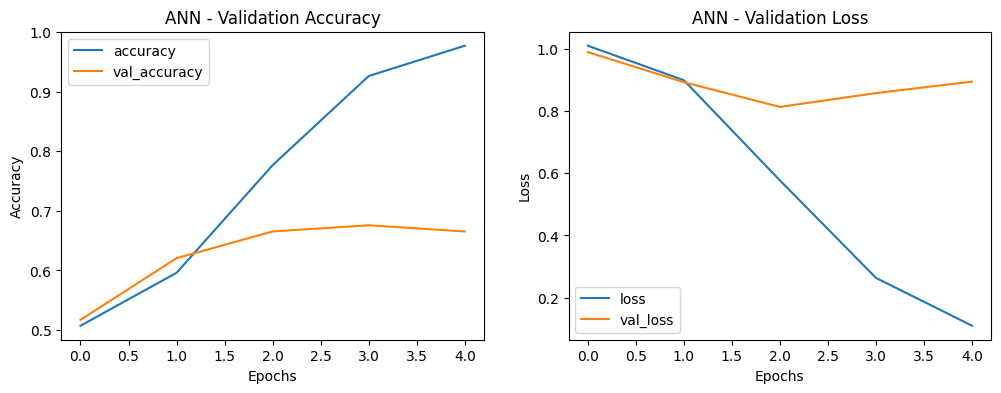

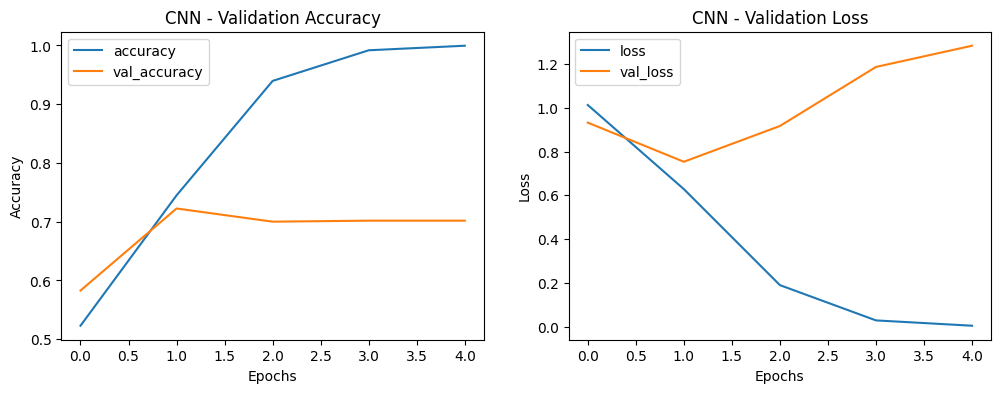

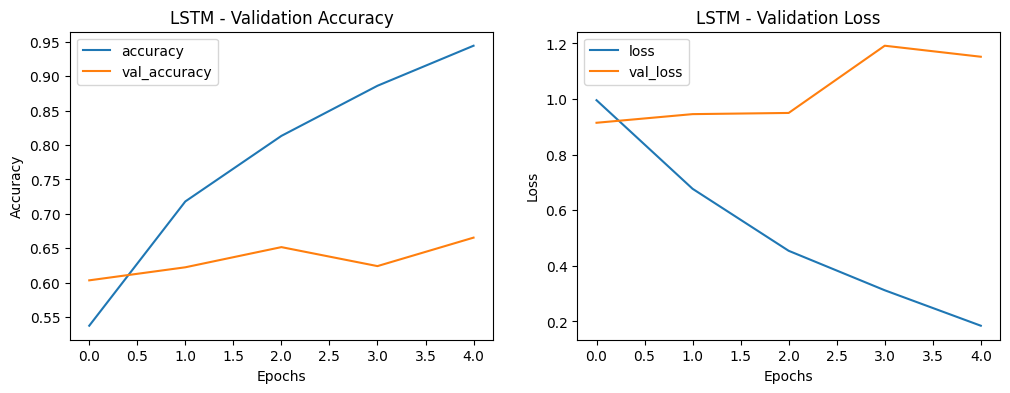

In [ ]:
import matplotlib.pyplot as plt
# --- Plotting Results ---
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history for all models
plot_history(hist_ann, "ANN")
plot_history(hist_cnn, "CNN")
plot_history(hist_lstm, "LSTM")



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


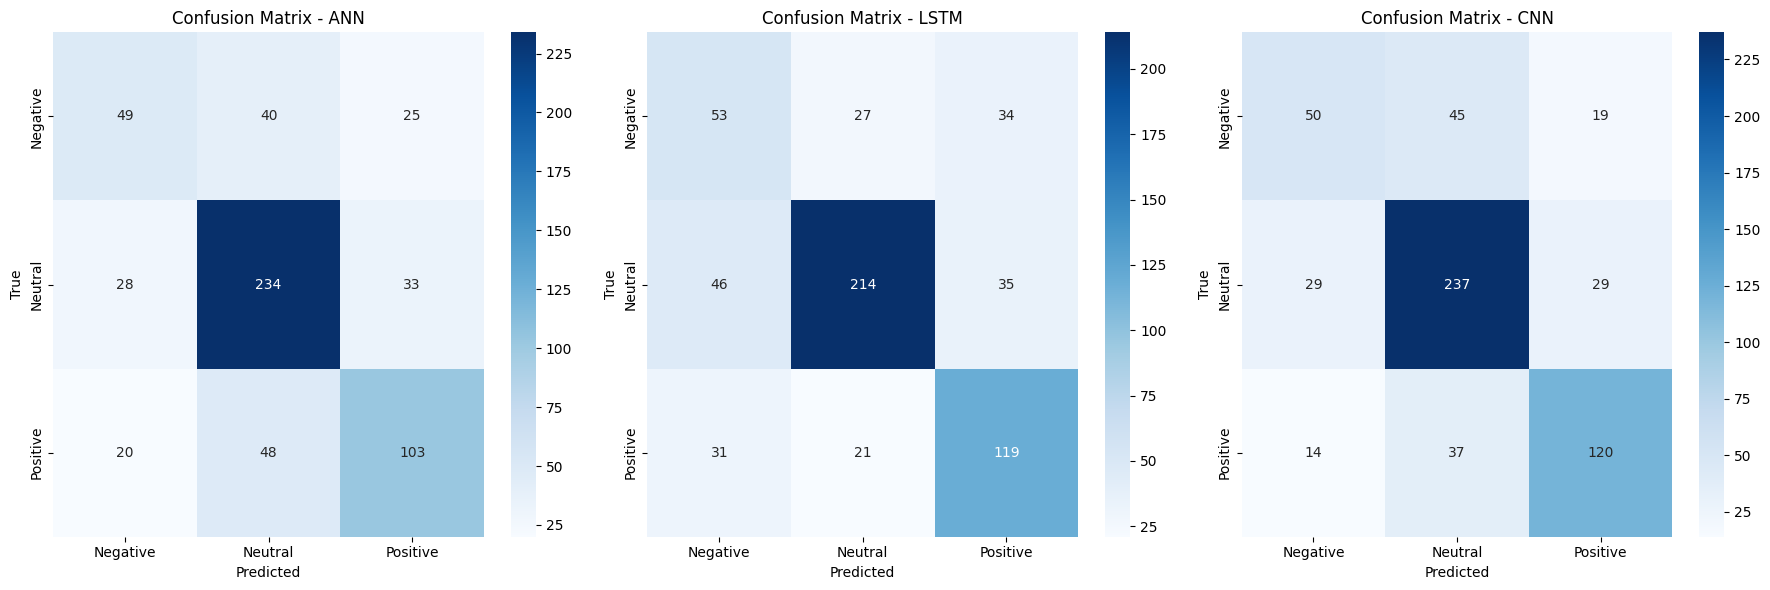

In [ ]:
# Get predictions for all three models
y_pred_nn = model_nn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_cnn = model.predict(X_test)

# Convert predictions to class labels
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrices
cm_nn = confusion_matrix(y_true, y_pred_nn_classes)
cm_lstm = confusion_matrix(y_true, y_pred_lstm_classes)
cm_cnn = confusion_matrix(y_true, y_pred_cnn_classes)

# Plot confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix - ANN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix - LSTM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, ax=axes[2])
axes[2].set_title('Confusion Matrix - CNN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()